# CSC 575 Intelligent Information Retrieval
### Siravich Khongrod (In-class)
## Homework #3: Written questions

### 1. Retrieval from an Inverted Index:
Consider the inverted index constructed from three documents (similar to the inverted index of HW#1). Follow this 'Inverted Index Retrieval Algorithm' and use the cosine similarity measure to determine which document is more relevant to the query: "search engine index".  Show the final ranking and the corresponding similarity scores.

In [68]:
# SOME PREPROCESSING
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk.corpus import stopwords
docs = ['Glimpse is an indexing and query system that allows for search through a file system or document collection quickly. Glimpse is the default search engine in a larger information retrieval system. It has also been used as part of some web based search engines.'
        ,'The main processes in an retrieval system are document indexing, query processing, query evaluation and relevance feedback. Among these, efficient updating of the index is critical in large scale systems.'
        ,'Clusters are created from short snippets of documents retrieved by web search engines which are as good as clusters created from the full text of web documents.']

for i in range(0,len(docs)):
    docs[i] = docs[i].lower()

docs_token = docs

porter = nltk.PorterStemmer()
for i in range(0,3):
    docs_token[i] = word_tokenize(docs[i])
    docs_token[i] = [w for w in docs_token[i] if w not in stopwords.words('english')] # filter English stopwords
    docs_token[i] = [porter.stem(tok) for tok in docs_token[i]] # apply stemmer
    docs_token[i] = [w for w in docs_token[i] if w.isalpha()] # filter tokens that contain non-alphabetic character(s)

for doc_t in docs_token:
    print(doc_t)
    print('\n')


word_count_dict = {}

for i in range(0,len(docs_token)):
#     print(docs_token[i])
    for word in docs_token[i]:
        word_count_dict.setdefault(word,[]).append(i)


NDocs=3
NTerms=len(word_count_dict.keys())

['glimps', 'index', 'queri', 'system', 'allow', 'search', 'file', 'system', 'document', 'collect', 'quickli', 'glimps', 'default', 'search', 'engin', 'larger', 'inform', 'retriev', 'system', 'also', 'use', 'part', 'web', 'base', 'search', 'engin']


['main', 'process', 'retriev', 'system', 'document', 'index', 'queri', 'process', 'queri', 'evalu', 'relev', 'feedback', 'among', 'effici', 'updat', 'index', 'critic', 'larg', 'scale', 'system']


['cluster', 'creat', 'short', 'snippet', 'document', 'retriev', 'web', 'search', 'engin', 'good', 'cluster', 'creat', 'full', 'text', 'web', 'document']




In [77]:
import math
query_raw='search engine index'
query_token = word_tokenize(query_raw)
query_token = [w for w in query_token if w not in stopwords.words('english')] # filter English stopwords
query_token = [porter.stem(tok) for tok in query_token] # apply stemmer
query_token = [w for w in query_token if w.isalpha()] # filter tokens that contain non-alphabetic character(s)
query_token

doc_TF={}
# CALCULATE THE TF
i=0
for doc_t in docs_token:
    TF=[]
    print('doc'+str(i))
    for token in query_token:
        print(token)
        tf=len([w for w in doc_t if token in w])/len(doc_t)
        print('tf: '+str(tf))
        TF.append(tf)
    print(TF)
    doc_TF[i]=TF
    i+=1
print()

IDF={}
# CALCULATE THE IDF
for token in query_token:
    print(token)
    print([token in doc_t for doc_t in docs_token])
    idf= 3/sum([token in doc_t for doc_t in docs_token])
    idf=math.log(idf,2)
    print('IDF: '+str(idf))
    IDF[token]=idf
#     for doc_t in docs_token:
#         print(token in doc_t)
    print()

print('TF')
print(doc_TF)
print('IDF')
print(IDF)
print()

for doc in doc_TF:
    print(0.5849625007211562**np.array(doc_TF[doc]))
    print(sum(0.5849625007211562**np.array(doc_TF[doc])))

doc0
search
tf: 0.11538461538461539
engin
tf: 0.07692307692307693
index
tf: 0.038461538461538464
[0.11538461538461539, 0.07692307692307693, 0.038461538461538464]
doc1
search
tf: 0.0
engin
tf: 0.0
index
tf: 0.1
[0.0, 0.0, 0.1]
doc2
search
tf: 0.0625
engin
tf: 0.0625
index
tf: 0.0
[0.0625, 0.0625, 0.0]

search
[True, False, True]
IDF: 0.5849625007211562

engin
[True, False, True]
IDF: 0.5849625007211562

index
[True, True, False]
IDF: 0.5849625007211562

TF
{0: [0.11538461538461539, 0.07692307692307693, 0.038461538461538464], 1: [0.0, 0.0, 0.1], 2: [0.0625, 0.0625, 0.0]}
IDF
{'search': 0.5849625007211562, 'engin': 0.5849625007211562, 'index': 0.5849625007211562}

[0.94 0.96 0.98]
2.879185162965608
[1.   1.   0.95]
2.9477914849414693
[0.97 0.97 1.  ]
2.9340847353914166


### 2. Indexing Models and Term Weighting:
Consider the following document-term table containing raw term frequencies. Answer the following questions, and in each case give the formulas you used to perform the necessary computations.

|  DOCS  |  Term1  |  Term2  |  Term3  |  Term4  |  Term5  |  Term6  |  Term7  |  Term8  |
|---------|---------|---------|---------|---------|---------|---------|---------|---------|
|  DOC1   | 0 | 3 | 1 | 0 | 0 | 2 | 1 | 0 |
|  DOC2   | 5 | 0 | 0 | 0 | 3 | 0 | 0 | 2 |
|  DOC3   | 3 | 0 | 4 | 3 | 4 | 0 | 0 | 5 |
|  DOC4   | 1 | 8 | 0 | 3 | 0 | 1 | 4 | 0 |
|  DOC5   | 0 | 1 | 0 | 0 | 0 | 5 | 4 | 2 |
|  DOC6   | 2 | 0 | 2 | 0 | 0 | 4 | 0 | 1 |
|  DOC7   | 2 | 5 | 0 | 3 | 0 | 1 | 4 | 2 |
|  DOC8   | 3 | 3 | 0 | 2 | 0 | 0 | 1 | 3 |
|  DOC9   | 0 | 0 | 3 | 3 | 3 | 0 | 0 | 0 |
|  DOC10  | 1 | 0 | 5 | 0 | 2 | 4 | 0 | 2 |

In [270]:
# TESTING OUT SKITLEARN PACKAGE
# The actual formula used for tf-idf is tf * (idf + 1) = tf + tf * idf,
#     instead of tf * idf. The effect of this is that terms with zero idf, i.e.
#     that occur in all documents of a training set, will not be entirely
#     ignored.
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(DT)
X_train_tf = tf_transformer.transform(DT) # returns sparse matrix, can be converted to dense matrix
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(X_train_tf.toarray())

[[0.   0.79 0.26 0.   0.   0.48 0.26 0.  ]
 [0.74 0.   0.   0.   0.6  0.   0.   0.3 ]
 [0.3  0.   0.49 0.36 0.54 0.   0.   0.5 ]
 [0.09 0.84 0.   0.32 0.   0.1  0.42 0.  ]
 [0.   0.16 0.   0.   0.   0.71 0.63 0.26]
 [0.36 0.   0.44 0.   0.   0.8  0.   0.18]
 [0.22 0.67 0.   0.4  0.   0.12 0.53 0.22]
 [0.48 0.59 0.   0.39 0.   0.   0.2  0.48]
 [0.   0.   0.56 0.56 0.62 0.   0.   0.  ]
 [0.12 0.   0.73 0.   0.33 0.53 0.   0.24]]


a. Compute the new weights for all the terms in document DOC4 using the tf x idf approach.  Use the raw term frequency for TF (for both documents and query) and the log of base 10 of N/df for IDF.

In [4]:
import numpy as np
DT=[[0,3,1,0,0,2,1,0],
	[5,0,0,0,3,0,0,2],
	[3,0,4,3,4,0,0,5],
	[1,8,0,3,0,1,4,0],
	[0,1,0,0,0,5,4,2],
	[2,0,2,0,0,4,0,1],
	[2,5,0,3,0,1,4,2],
	[3,3,0,2,0,0,1,3],
	[0,0,3,3,3,0,0,0],
	[1,0,5,0,2,4,0,2]]

DT=np.array(DT)
TD=DT.T
# numpy.matrix.transpose(DT)
# TD=numpy.asarray(DT).transpose()
nTerms=DT.shape[1]
nDocs=DT.shape[0]

# nDocs containing term
# calculate document frequency
# DF = TD.sum(axis=1)
DF = np.array([(TD!=0).sum(1)]).T
DF.T

array([[7, 5, 5, 5, 4, 6, 5, 7]])

In [304]:
import numpy as np
NMatrix=numpy.ones(numpy.shape(TD), dtype=float)*nDocs
IDF = np.log2(np.divide(NMatrix, DF))
# IDF = np.divide(NMatrix.transpose(), DF)
TD_tfidf = TD * IDF
# print(X_train_tf.toarray())
DT_tfidf=np.array(TD_tfidf).T
DT_tfidf

array([[0.  , 3.  , 1.  , 0.  , 0.  , 1.47, 1.  , 0.  ],
       [2.57, 0.  , 0.  , 0.  , 3.97, 0.  , 0.  , 1.03],
       [1.54, 0.  , 4.  , 3.  , 5.29, 0.  , 0.  , 2.57],
       [0.51, 8.  , 0.  , 3.  , 0.  , 0.74, 4.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 3.68, 4.  , 1.03],
       [1.03, 0.  , 2.  , 0.  , 0.  , 2.95, 0.  , 0.51],
       [1.03, 5.  , 0.  , 3.  , 0.  , 0.74, 4.  , 1.03],
       [1.54, 3.  , 0.  , 2.  , 0.  , 0.  , 1.  , 1.54],
       [0.  , 0.  , 3.  , 3.  , 3.97, 0.  , 0.  , 0.  ],
       [0.51, 0.  , 5.  , 0.  , 2.64, 2.95, 0.  , 1.03]])

#### a. Compute the new weights for all the terms in document DOC4 using the tf x idf approach. 
DOC4: [0.51, 8.  , 0.  , 3.  , 0.  , 0.74, 4.  , 0.  ],

#### b. Compute the new weights for all the terms in documents DOC4 using the signal-to-noise ratio approach. 
pk = Prob(term k occurs in document i) = tfik / tfk

Infok = - pk log pk

Noisek = - pk log (1/pk)
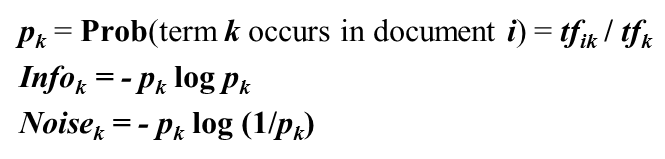

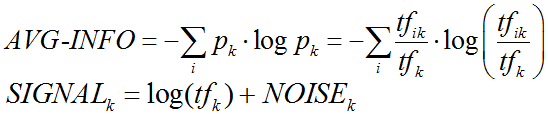

In [15]:
import numpy as np
DT=[[0,3,1,0,0,2,1,0],
	[5,0,0,0,3,0,0,2],
	[3,0,4,3,4,0,0,5],
	[1,8,0,3,0,1,4,0],
	[0,1,0,0,0,5,4,2],
	[2,0,2,0,0,4,0,1],
	[2,5,0,3,0,1,4,2],
	[3,3,0,2,0,0,1,3],
	[0,0,3,3,3,0,0,0],
	[1,0,5,0,2,4,0,2]]
DT=np.array(DT)
tf_k=DT.sum(axis=0)
np.set_printoptions(precision=2,suppress=True,linewidth=120)
p_k=DT/tf_k
p_k

array([[0.  , 0.15, 0.07, 0.  , 0.  , 0.12, 0.07, 0.  ],
       [0.29, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.12],
       [0.18, 0.  , 0.27, 0.21, 0.33, 0.  , 0.  , 0.29],
       [0.06, 0.4 , 0.  , 0.21, 0.  , 0.06, 0.29, 0.  ],
       [0.  , 0.05, 0.  , 0.  , 0.  , 0.29, 0.29, 0.12],
       [0.12, 0.  , 0.13, 0.  , 0.  , 0.24, 0.  , 0.06],
       [0.12, 0.25, 0.  , 0.21, 0.  , 0.06, 0.29, 0.12],
       [0.18, 0.15, 0.  , 0.14, 0.  , 0.  , 0.07, 0.18],
       [0.  , 0.  , 0.2 , 0.21, 0.25, 0.  , 0.  , 0.  ],
       [0.06, 0.  , 0.33, 0.  , 0.17, 0.24, 0.  , 0.12]])

In [21]:
info_k=-p_k*np.log2(p_k)
info_k
# CHECK IF nan CAN BE ZEROED
info_k=np.nan_to_num(info_k)
np.nan_to_num(info_k)

C:\Users\skhongro\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
C:\Users\skhongro\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


array([[0.  , 0.41, 0.26, 0.  , 0.  , 0.36, 0.27, 0.  ],
       [0.52, 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.36],
       [0.44, 0.  , 0.51, 0.48, 0.53, 0.  , 0.  , 0.52],
       [0.24, 0.53, 0.  , 0.48, 0.  , 0.24, 0.52, 0.  ],
       [0.  , 0.22, 0.  , 0.  , 0.  , 0.52, 0.52, 0.36],
       [0.36, 0.  , 0.39, 0.  , 0.  , 0.49, 0.  , 0.24],
       [0.36, 0.5 , 0.  , 0.48, 0.  , 0.24, 0.52, 0.36],
       [0.44, 0.41, 0.  , 0.4 , 0.  , 0.  , 0.27, 0.44],
       [0.  , 0.  , 0.46, 0.48, 0.5 , 0.  , 0.  , 0.  ],
       [0.24, 0.  , 0.53, 0.  , 0.43, 0.49, 0.  , 0.36]])

In [33]:
avginfo=sum(info_k)
avginfo
noise=-avginfo
signal=np.log2(tf_k)+noise
signal

array([1.48, 2.26, 1.76, 1.5 , 1.63, 1.74, 1.71, 1.43])

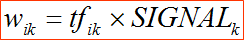

In [35]:
w=DT*signal
w

array([[ 0.  ,  6.77,  1.76,  0.  ,  0.  ,  3.48,  1.71,  0.  ],
       [ 7.39,  0.  ,  0.  ,  0.  ,  4.88,  0.  ,  0.  ,  2.87],
       [ 4.43,  0.  ,  7.03,  4.5 ,  6.5 ,  0.  ,  0.  ,  7.17],
       [ 1.48, 18.05,  0.  ,  4.5 ,  0.  ,  1.74,  6.86,  0.  ],
       [ 0.  ,  2.26,  0.  ,  0.  ,  0.  ,  8.71,  6.86,  2.87],
       [ 2.96,  0.  ,  3.52,  0.  ,  0.  ,  6.97,  0.  ,  1.43],
       [ 2.96, 11.28,  0.  ,  4.5 ,  0.  ,  1.74,  6.86,  2.87],
       [ 4.43,  6.77,  0.  ,  3.  ,  0.  ,  0.  ,  1.71,  4.3 ],
       [ 0.  ,  0.  ,  5.27,  4.5 ,  4.88,  0.  ,  0.  ,  0.  ],
       [ 1.48,  0.  ,  8.79,  0.  ,  3.25,  6.97,  0.  ,  2.87]])

DOC4: [ 1.48, 18.05,  0.  ,  4.5 ,  0.  ,  1.74,  6.86,  0.  ]

_____
#### c. Using the Keyword Discrimination approach, determine if Term4 is a good index term or not (by computing it's discriminant). To compute average similarities use Cosine similarity as your similarity measure. Show your work.
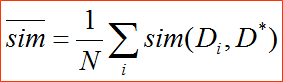

In [148]:
from scipy.spatial import distance
avgtf=np.sum(DT,axis=0) # D*
doc_sim=[distance.cosine(avgtf,doc) for doc in DT]
doc_sim #sim_bar
# DT

[0.294778560942374,
 0.4416507661724517,
 0.2666666666666667,
 0.32028292484888343,
 0.36155760193093855,
 0.338267768390352,
 0.1818622079815363,
 0.19920527639780716,
 0.47435897435897434,
 0.31539902060675273]

In [159]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
# X = np.array([1,2,3,4])
# kf = KFold(n_splits=4)
# for train_index in kf.split(X):
#     print(train_index)
TD=DT.T
nTerms=DT.shape[1]
kf = KFold(n_splits=nTerms)
[fold for fold in kf.split(TD)] # TERM INDEX

# TRY USING ONE DOC
# for train,fold in kf.split(TD):
#     print(DT[3][train],end="")
#     print('\t\t\t| element '+str(fold[0])+'['+str(DT[3][fold][0])+']'+' folded')
#     print('D*: ',end="")
#     print(avgtf[train])
#     print('distance: ',end="")
#     print(distance.cosine(DT[3][train],avgtf[train]))
#     print()

# NOW TRY ON WHOLE DATASET
#Note: D* for each of the SIMk is now computed with only two terms
sim_raw=np.zeros(TD.shape)
i=0
for train,fold in kf.split(TD):
    sim=[]
    for doc in DT:
#         print(doc[train])
#         print(avgtf[train])
        sim_ik=distance.cosine(doc[train],avgtf[train])
        sim.append(sim_ik)
#         print(sim_ik)
#         print()
#     print()
#     print(sim)
    sim_raw[i]=sim
    i+=1
    

sim_k=np.average(sim_raw,axis=1)
sim_k

array([0.33, 0.3 , 0.32, 0.32, 0.32, 0.32, 0.32, 0.33])

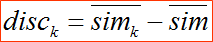

In [160]:
avg_sim=np.average(doc_sim)
sim_k-avg_sim

array([ 0.01, -0.02,  0.  ,  0.  , -0.  , -0.  , -0.  ,  0.01])

disck > 0 ==> termk is a good discriminant  
disck < 0 ==> termk is a poor discriminant  
disck = 0 ==> termk is indifferent

Discriminant value for Term 4 is 0 so it is indifferent

### 3. Vector-Space Retrieval Model:
Consider the following document-term table with 10 documents and 8 terms (A through H) containing raw term frequencies. We also have a specified query, Q, with the indicated raw term weights (the bottom row in the table). Answer the following questions, and in each case give the formulas you used to perform the necessary computations. Note: You should do this problem using a spreadsheet program such as Microsoft Excel. Alternatively, you can write a program to perform the computations. Please include your worksheets or code in the assignment submission).

a. Compute the ranking score for each document based on each of the following query-document similarity measures (sort the documents in the decreasing order of the rank score):
* dot product
* Cosine similarity
* Dice's coefficient
* Jaccard's Coefficient 


| DOCS  | A | B | C | D | E | F | G | H |
|-------|---|---|---|---|---|---|---|---|
| DOC1  | 0 | 3 | 4 | 0 | 0 | 2 | 4 | 0 |
| DOC2  | 5 | 5 | 0 | 0 | 4 | 0 | 4 | 3 |
| DOC3  | 3 | 0 | 4 | 3 | 4 | 0 | 0 | 5 |
| DOC4  | 0 | 7 | 0 | 3 | 2 | 0 | 4 | 3 |
| DOC5  | 0 | 1 | 0 | 0 | 0 | 5 | 4 | 2 |
| DOC6  | 2 | 0 | 2 | 0 | 0 | 4 | 0 | 1 |
| DOC7  | 3 | 5 | 3 | 4 | 0 | 0 | 4 | 2 |
| DOC8  | 0 | 3 | 0 | 0 | 0 | 4 | 4 | 2 |
| DOC9  | 0 | 0 | 3 | 3 | 3 | 0 | 0 | 1 |
| DOC10 | 0 | 5 | 0 | 0 | 0 | 4 | 4 | 2 |
| Query | 2 | 1 | 1 | 0 | 2 | 0 | 3 | 0 |

In [162]:
DT=[[0,3,4,0,0,2,4,0],[5,5,0,0,4,0,4,3],[3,0,4,3,4,0,0,5],[0,7,0,3,2,0,4,3],[0,1,0,0,0,5,4,2],[2,0,2,0,0,4,0,1],[3,5,3,4,0,0,4,2],[0,3,0,0,0,4,4,2],[0,0,3,3,3,0,0,1],[0,5,0,0,0,4,4,2]]
query=[2,1,1,0,2,0,3,0]

In [163]:
from scipy.spatial import distance

dist=[['doc','dot','cosine','dice','jaccard']]
i=0
for doc in DT:
#     print([i+1,np.dot(query,doc),distance.cosine(doc,query),distance.dice(doc,query),distance.jaccard(doc,query)])
    dist.append(([i+1,np.dot(query,doc),distance.cosine(doc,query),distance.dice(doc,query),distance.jaccard(doc,query)]))
    i+=1

import pandas as pd
distances=pd.DataFrame(data=dist[:][1:],columns=dist[:1][0])
distances

,doc,dot,cosine,dice,jaccard
0,1,19,0.350214,-0.727273,1.000000
1,2,35,0.158274,-1.333333,1.000000
2,3,18,0.523168,-0.285714,1.000000
3,4,23,0.434293,-0.642857,0.857143
4,5,13,0.560268,-0.238095,0.857143
5,6,6,0.724701,0.333333,0.857143
6,7,26,0.328907,-0.733333,1.000000
7,8,15,0.487011,-0.363636,1.000000
8,9,9,0.609801,0.052632,1.000000
9,10,17,0.500648,-0.416667,1.000000


In [178]:
# sort the documents in the decreasing order of the rank score):
# print(np.array(distances.sort_values(by=['dot'])['doc']))
for dtype in dist[0][1:]:
    print(dtype,end="\t")
    print(np.array(distances.sort_values(by=[dtype])['doc']))

dot	[ 6  9  5  8 10  3  1  4  7  2]
cosine	[ 2  7  1  4  8 10  3  5  9  6]
dice	[ 2  7  1  4 10  8  3  5  9  6]
jaccard	[ 4  5  6  1  2  3  7  8  9 10]


#### b. Compare the ranking obtained when, instead, binary term weights are used to the ranking obtained in part a where raw term weights were used (do this only with dot product as the similarity measure). Explain any discrepancy between the two rankings.

In [164]:
DT_binary=np.where(np.array(DT)>0,1,0)
DT_binary

array([[0, 1, 1, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 1, 0, 0, 1],
       [0, 1, 0, 1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 1]])

In [232]:
dist=[['doc','dot','cosine','dice','jaccard']]
i=0
for doc in DT_binary:
    dist.append(([i+1,np.dot(query,doc),distance.cosine(doc,query),distance.dice(doc,query),distance.jaccard(doc,query)]))
    i+=1
    
dist=pd.DataFrame(data=dist[:][1:],columns=dist[:1][0])
dist

,doc,dot,cosine,dice,jaccard
0,1,5,0.426461,0.230769,0.666667
1,2,8,0.179217,-0.142857,0.833333
2,3,5,0.487011,0.285714,0.857143
3,4,6,0.384413,0.142857,0.857143
4,5,4,0.541169,0.384615,0.857143
5,6,3,0.655876,0.538462,0.857143
6,7,7,0.344390,0.066667,0.714286
7,8,4,0.541169,0.384615,0.857143
8,9,3,0.655876,0.538462,0.857143
9,10,4,0.541169,0.384615,0.857143


#### c. Construct a similar table to above, but instead of raw term frequencies compute the (non-normalized) tf x idf weights for the terms.  Use the raw term frequency for TF (for both documents and query) and the log of base 10 of N/df for IDF.  Then compute the ranking scores using the Cosine similarity. Explain any significant differences between the ranking you obtained here and the Cosine ranking from the previous part.

In [230]:
TD=np.array(DT).T
NDocs=TD.shape[1]
# DF=np.array(DT).sum(axis=0)
DF = np.array([(TD!=0).sum(1)]).T
NMatrix=np.ones(TD.shape)*NDocs
TD_TFIDF = TD * np.log10(np.divide(NMatrix,DF))
# pd.DataFrame(TFIDF)
TD_TFIDF

array([[0.  , 1.99, 1.19, 0.  , 0.  , 0.8 , 1.19, 0.  , 0.  , 0.  ],
       [0.46, 0.77, 0.  , 1.08, 0.15, 0.  , 0.77, 0.46, 0.  , 0.77],
       [1.2 , 0.  , 1.2 , 0.  , 0.  , 0.6 , 0.9 , 0.  , 0.9 , 0.  ],
       [0.  , 0.  , 1.19, 1.19, 0.  , 0.  , 1.59, 0.  , 1.19, 0.  ],
       [0.  , 1.59, 1.59, 0.8 , 0.  , 0.  , 0.  , 0.  , 1.19, 0.  ],
       [0.6 , 0.  , 0.  , 0.  , 1.51, 1.2 , 0.  , 1.2 , 0.  , 1.2 ],
       [0.62, 0.62, 0.  , 0.62, 0.62, 0.  , 0.62, 0.62, 0.  , 0.62],
       [0.  , 0.14, 0.23, 0.14, 0.09, 0.05, 0.09, 0.09, 0.05, 0.09]])

In [308]:
tffidf_cosine=[]
for doc in TD_TFIDF.T:
#     print(distance.cosine(doc,query))
    tffidf_cosine.append(distance.cosine(doc,query))

[distances['cosine'],tffidf_cosine]

pd.concat([pd.DataFrame(tffidf_cosine,columns=['tfidf']), distances['cosine']], axis=1, sort=False)

,tfidf,cosine
0,0.478928,0.585356
1,0.179099,0.404542
2,0.407681,0.523168
3,0.454479,0.470915
4,0.717893,0.560268
5,0.678318,0.724701
6,0.434045,0.372785
7,0.628436,0.513336
8,0.605819,0.602640
9,0.613410,0.643113


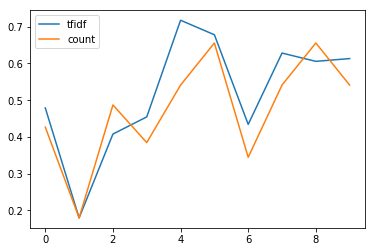

In [264]:
import matplotlib.pyplot as plt
plt.plot(pd.concat([pd.DataFrame(tffidf_cosine,columns=['tfidf']), dist['cosine']], axis=1, sort=False))
plt.legend(['tfidf','count'])
plt.show()

#### Explain any significant differences between the ranking you obtained here and the Cosine ranking from the previous part.
# TODO: EXPLAIN

### 4. Probabilistic Retrieval Model:

We are interested in using the following document-term matrix and the associated relevance information as training data for a probabilistic retrieval model. A 1 entry indicates that the term occurs in a document, and 0 means it does not: R or NR indicate the relevance of the document with respect to queries in the training data.
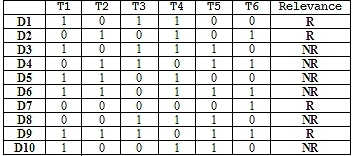
Using the basic probabilistic retrieval model, compute the relevance and non-relevance probabilities associated with terms T1 through T6 (show these probabilities in a table). Then, using these probabilities and the given query Q = (1,1,0,1,0,1), compute the discriminant Disc(Q, D11) and Disc(Q, D12) for each of the two new documents:
* D11 = (0,1,1,0,0,1)
* D12 = (1,0,1,1,0,1)

Based on the discriminants, should these documents be retrieved? Explain your answer.

Term 1 to term 5 is given in lecture slides:
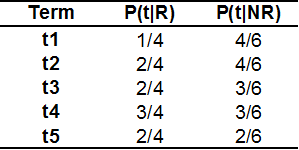

Term6 has the following estimation: 
$$  P(T_6|R)=0.75 $$
$$  P(T_6|NR)=0.33 $$

#### D11:
$\begin{aligned}
    dis(Q,D_{11}) &=
    \frac{(1-P(t_1|R)) * P(t_2|R) * (1-P(t_4|R)) * P(T_6|R)}
        {(1-P(t_1|NR)) * P(t_2|NR) * (1-P(t_4|NR)) * P(T_6|NR)} \\
     &= 
    \frac{(1-0.25)*0.5*(1-0.75)*0.75}
        {(1-0.66)*0.66*(1-0.5)*0.33}
    =
    \frac{0.0703125}{0.037026}
    =1.899003403
\end{aligned}$

#### D12:
$\begin{aligned}
    dis(Q,D_{12}) &=
    \frac{P(t_1|R) * (1-P(t_2|R) * P(t_4|R) * P(T_6|R)}
        {P(t_1|NR) * (1-P(t_2|NR) * P(t_4|NR) * P(T_6|NR)} \\
     &= 
    \frac{0.25 * (1-0.5) * 0.75 * 0.75}
        {0.66 * (1-0.66) * 0.5 * 0.33}
    =\frac{0.0703125}{0.037026}
    =1.899003403
\end{aligned}$

#### Based on the discriminants, should these documents be retrieved? Explain your answer.

Since dis(D) > 1 for both documents, it should be retrieved